# Phoebe Eclipse Heatmaps

Notebook for plotting a heatmap of the primary and secondary eclipse depth.

## Import Dependances

In [1]:
import phoebe as phb
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import re

Connection to online passbands at https://tables.phoebe-project.org could not be established.  Check your internet connection or try again later (can manually call phoebe.list_online_passbands(refresh=True) to retry).  If the problem persists and you're using a Mac, you may need to update openssl (see https://phoebe-project.org/help/faq). Original error from urlopen: URLError <urlopen error timed out>


In [2]:
import sys
sys.path.append('../')
from Functions.phoebeCustom import normaliseFluxes

## Load in Simulation

In [3]:
bSystem = phb.load('../../Data/Phoebe Simulations/08.12.2025/Grange.phoebe')

## Extract Data and Calculate Magnitude Differenfes

In [4]:
q = []
teff = []
prim_diff = []
sec_diff = []
prim_fwhm = []
sec_fwhm = []

for modelname in bSystem.models:
    # Fetch q & teff
    q_i, teff_i = re.findall(r'\d+(?!\d+)', modelname)
    q_i = float(q_i)
    teff_i = int(teff_i)
    
    if q_i == 10: q_i /= 10 # Get correct q since phoebe doesnt like decimal numbers
    else: q_i /= 100
    if q_i not in q: q.append(q_i) # Append if not in list
    
    if teff_i not in teff: teff.append(teff_i)
    
    # Calculate magnitude differences
    model = bSystem[f'{modelname}']
    normalmodel = normaliseFluxes(model)
    
    prim_flux = np.array(normalmodel['fluxes'].get_value()[:200])
    sec_flux = np.array(normalmodel['fluxes'].get_value()[400:600])
    
    prim_mag = np.ptp(prim_flux) - 0.5
    sec_mag = np.ptp(sec_flux) - 0.5
    
    prim_diff.append(prim_mag)
    sec_diff.append(sec_mag)
    
    # Calculate FWHMs
    
prim_diff = np.array(prim_diff).reshape(len(teff), len(q))
sec_diff = np.array(sec_diff).reshape(len(teff), len(q))


In [8]:
mpl.rc('font', size=16)
mpl.rc('font', family='serif')

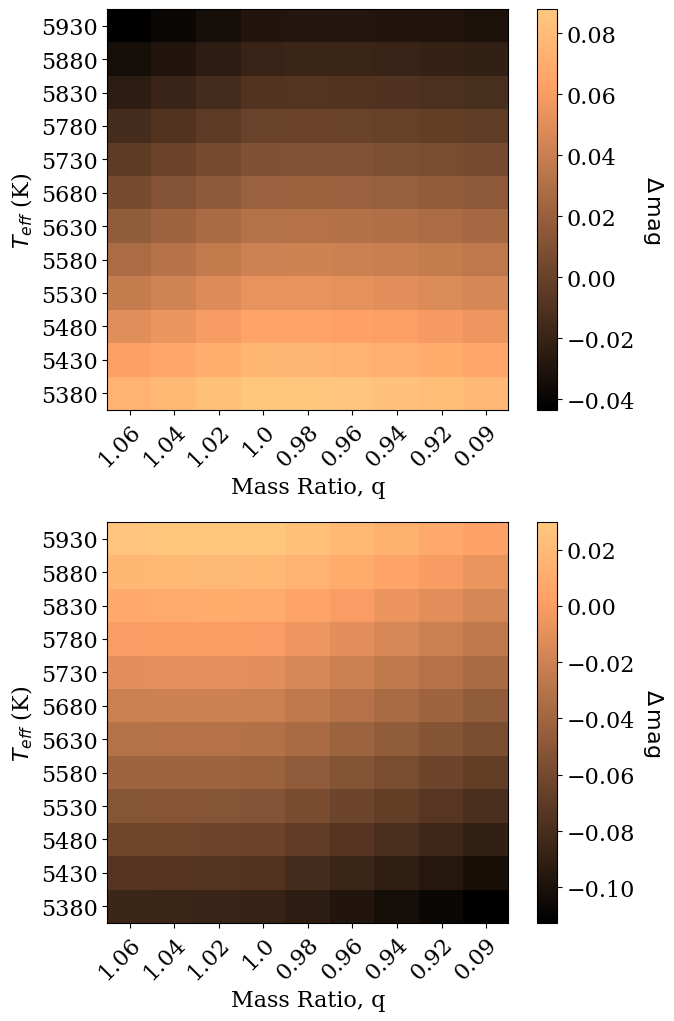

In [10]:
# Primary Eclipse
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(7, 10.5))
im = ax.imshow(prim_diff, aspect="auto", cmap='copper')
ax.set_xticks(range(len(q)), labels=q, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(teff)), labels=teff)
ax.set_xlabel('Mass Ratio, q')
ax.set_ylabel(r'$T_{eff}$ (K)')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r'$\Delta\,\text{mag}$', rotation=-90, va='bottom')

# for i in range(len(teff)):
#     for j in range(len(q)):
#         color = 'w'
#         if teff[i] == 5780 and q[j] == 1: color = 'r'
#         text = ax.text(j, i, np.format_float_positional(prim_diff[i, j], precision=2, unique=True, fractional=False, trim='k'), ha="center", va="center", color=color)
        
# ax.set_title("Primary Eclipse Depth Difference from Identical Components")
ax.set_box_aspect(1)

# Secondary Eclipse
# fig2, ax2 = plt.subplots()
im2 = ax2.imshow(sec_diff, aspect="auto", cmap='copper')
ax2.set_xticks(range(len(q)), labels=q, rotation=45, ha="right", rotation_mode="anchor")
ax2.set_yticks(range(len(teff)), labels=teff)
ax2.set_xlabel('Mass Ratio, q')
ax2.set_ylabel(r'$T_{eff}$ (K)')

# for i in range(len(teff)):
#     for j in range(len(q)):
#         color = 'w'
#         if teff[i] == 5780 and q[j] == 1: color = 'r'
#         text = ax2.text(j, i, np.format_float_positional(sec_diff[i, j], precision=2, unique=True, fractional=False, trim='k'), ha="center", va="center", color=color)
        
# ax2.set_title("Secondary Eclipse Depth Difference from Identical Components")


cbar2 = ax2.figure.colorbar(im2, ax=ax2)
cbar2.ax.set_ylabel(r'$\Delta\,\text{mag}$', rotation=-90, va='bottom')

ax2.set_box_aspect(1)
fig.tight_layout()
plt.show()